In [82]:
import pandas as pd
from pandas import Series, DataFrame
import sqlite3
import matplotlib
import numpy as np
matplotlib.rcParams.update({'font.size': 15})
%matplotlib inline
data = pd.read_csv('spend.csv')
L = DataFrame(data)
L = L.rename(columns = {"Account Type": "Account_type"})
L = L.rename(columns = {"Character Code": "Character_code"})
L = L.rename(columns = {"2015": "year_2015"})
L = L.rename(columns = {"2016": "year_2016"})
L = L.rename(columns = {"2017": "year_2017"})
L = L.rename(columns = {"2018": "year_2018"})
L["Agency"] = L["Agency"].str.replace(" - ", "", regex = False)
L = L.fillna(0)

L["year_2015"] = np.abs(L["year_2015"]) 
L["year_2016"] = np.abs(L["year_2016"]) 
L["year_2017"] = np.abs(L["year_2017"]) 
L["year_2018"] = np.abs(L["year_2018"]) 
L1 = L[L["Agency"] == "15 FINANCE"]
L1

,Agency,Organization,Account_type,Character_code,Object,year_2015,year_2016,year_2017,year_2018
145,15 FINANCE,15100 - FIN ACCOUNTING,Revenue,47 - MISC REVENUE,47190 - MISCELLANEOUS REVENUE,15240.83,15000.00,15000.00,15000.00
266,15 FINANCE,15400 - FIN ADMIN SUPPORT,Revenue,42 - INTERGOV REVENUES,42410 - OTHER UNIT OF GOV REVENUES OP,1002.30,157.28,808.07,242.39
472,15 FINANCE,15110 - FIN ACCOUNTING PAYROLL,Expense,54 - PURCHASED SERVICES,54330 - EQUIP IMPROV REPAIR MAINT,0.00,0.00,0.00,117.82
495,15 FINANCE,15100 - FIN ACCOUNTING,Expense,51 - SALARIES,51120 - PREMIUM PAY,0.00,0.00,0.00,2.46
806,15 FINANCE,15230 - FIN INTERNAL AUDIT,Expense,54 - PURCHASED SERVICES,54120 - TELEPHONE,0.00,0.00,3.62,0.00
807,15 FINANCE,15300 - FIN RISK MGMT,Expense,54 - PURCHASED SERVICES,54320 - COMMUNICATION DEVICE RPR MAIN,0.00,0.00,3.83,0.00
808,15 FINANCE,15300 - FIN RISK MGMT,Expense,54 - PURCHASED SERVICES,54515 - MILEAGE,0.00,0.00,4.02,0.00
824,15 FINANCE,15110 - FIN ACCOUNTING PAYROLL,Expense,54 - PURCHASED SERVICES,54320 - COMMUNICATION DEVICE RPR MAIN,0.00,0.00,10.02,0.00
825,15 FINANCE,15111 - FIN ACCOUNTING PURCHASING,Expense,54 - PURCHASED SERVICES,54320 - COMMUNICATION DEVICE RPR MAIN,0.00,0.00,10.02,0.00
826,15 FINANCE,15400 - FIN ADMIN SUPPORT,Expense,54 - PURCHASED SERVICES,54320 - COMMUNICATION DEVICE RPR MAIN,0.00,0.00,10.94,0.00


,Character_code,year2015,year2016,year2017,year2018
0,42 - INTERGOV REVENUES,1002.30,157.28,808.07,242.39
1,47 - MISC REVENUE,15240.83,15000.00,15000.00,15000.00
2,48 - OTHER FINANCE SOURCE,2.12,0.00,0.00,0.00
3,49 - TRANSFER IN,0.00,0.00,15745.00,0.00
4,51 - SALARIES,2019698.60,2123309.20,2238184.76,2229594.99
5,52 - BENEFITS,803152.18,713268.44,809549.64,756532.11
6,53 - SUPPLIES,37081.37,41744.06,49753.88,37136.08
7,54 - PURCHASED SERVICES,558984.80,506544.76,609997.76,564544.12
8,56 - DEBT OTHR FINANCING,0.00,0.00,167.56,0.00
9,57 - INTER DEPART CHARGES,12200.00,13337.00,15450.00,7841.00


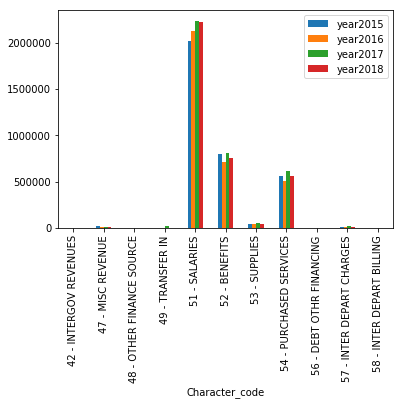

In [7]:
conn = sqlite3.connect('data.db')
L1.to_sql("data_table", conn, if_exists="replace", index=False)
df1 = pd.read_sql("select Character_code, SUM(year_2015) as year2015, SUM(year_2016) as year2016, SUM(year_2017) as year2017, SUM(year_2018) as year2018 from data_table group by Character_code", conn)

df1.plot.bar(x = "Character_code")
None
df1

,Organization,year2015,year2016,year2017,year2018
0,15100 - FIN ACCOUNTING,1336455.97,1368413.63,1544611.61,1384565.75
1,15110 - FIN ACCOUNTING PAYROLL,493075.40,361960.82,371762.37,405551.73
2,15111 - FIN ACCOUNTING PURCHASING,386420.09,407154.60,419333.82,450175.15
3,15200 - FIN BUDGET AND PROGRAM MGMT,604483.30,661600.10,714824.44,784647.81
4,15230 - FIN INTERNAL AUDIT,43824.34,34235.54,77382.95,9116.79
5,15300 - FIN RISK MGMT,20681.96,16512.36,45094.59,5294.74
6,15400 - FIN ADMIN SUPPORT,562421.14,563483.69,581646.89,571538.72


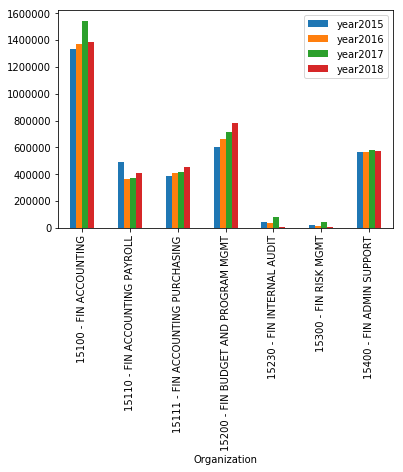

In [3]:
df2 = pd.read_sql("select Organization, SUM(year_2015) as year2015, SUM(year_2016) as year2016, SUM(year_2017) as year2017, SUM(year_2018) as year2018 from data_table group by Organization", conn)

df2.plot.bar(x = "Organization")
None 
df2

,revenue,expense
year,,
2015,16.24525,3431.11695
2016,15.15728,3398.20346
2017,31.55307,3723.10360
2018,15.24239,3595.64830


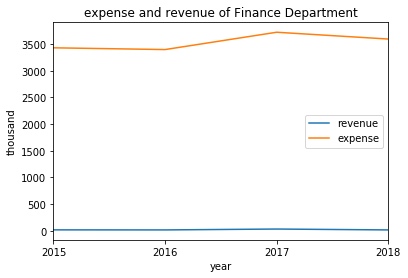

In [18]:
L_revenue = L1[L1["Account_type"] == "Revenue"]
L_expense = L1[L1["Account_type"] == "Expense"]
dic = {}
revenue = []
expense = []
revenue.append( L_revenue["year_2015"].sum()/1000)
revenue.append( L_revenue["year_2016"].sum()/1000)
revenue.append( L_revenue["year_2017"].sum()/1000)
revenue.append( L_revenue["year_2018"].sum()/1000)
expense.append(L_expense["year_2015"].sum()/1000)
expense.append(L_expense["year_2016"].sum()/1000)
expense.append(L_expense["year_2017"].sum()/1000)
expense.append(L_expense["year_2018"].sum()/1000)
dic["year"] = ["2015", "2016", "2017", "2018"]
dic["revenue"] = revenue
dic["expense"] = expense

df1 = pd.DataFrame(dic)
df1 = df1.set_index("year")

ax = df1.plot.line(title = "expense and revenue of Finance Department")
ax.set_xticks(range(len(df1.index)))
ax.set_xticklabels(df1.index)
ax.set_ylabel('thousand')
None
df1

Character_code,42 - INTERGOV REVENUES,47 - MISC REVENUE,48 - OTHER FINANCE SOURCE,49 - TRANSFER IN
year_2015,10.0230,152.4083,0.0212,0.00
year_2016,1.5728,150.0000,0.0000,0.00
year_2017,8.0807,150.0000,0.0000,157.45
year_2018,2.4239,150.0000,0.0000,0.00


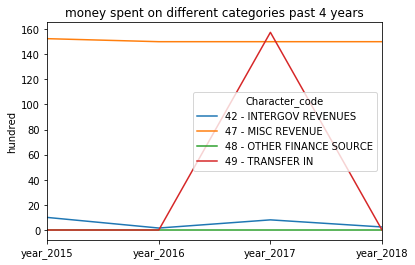

In [8]:
df2 = L_revenue.groupby(by = "Character_code").sum()
df2 = np.abs(df2)
df2["year_2015"] = df2["year_2015"] / 100
df2["year_2016"] = df2["year_2016"] / 100
df2["year_2017"] = df2["year_2017"] / 100
df2["year_2018"] = df2["year_2018"] / 100
df2 = df2.stack()
df2 = df2.unstack(0)
ax = df2.plot.line(title = "money spent on different categories past 4 years")
ax.set_xticks(range(len(df2.index)))
ax.set_xticklabels(df2.index)
ax.set_ylabel('hundred')
None 
df2

Character_code,51 - SALARIES,52 - BENEFITS,53 - SUPPLIES,54 - PURCHASED SERVICES,56 - DEBT OTHR FINANCING,57 - INTER DEPART CHARGES,58 - INTER DEPART BILLING
year_2015,2019.69860,803.15218,37.08137,558.98480,0.00000,12.200,0.0
year_2016,2123.30920,713.26844,41.74406,506.54476,0.00000,13.337,0.0
year_2017,2238.18476,809.54964,49.75388,609.99776,0.16756,15.450,0.0
year_2018,2229.59499,756.53211,37.13608,564.54412,0.00000,7.841,0.0


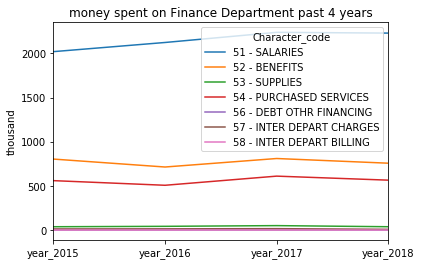

In [9]:
df3 = L_expense.groupby(by = "Character_code").sum()
df3 = np.abs(df3)
df3["year_2015"] = df3["year_2015"] / 1000
df3["year_2016"] = df3["year_2016"] / 1000
df3["year_2017"] = df3["year_2017"] / 1000
df3["year_2018"] = df3["year_2018"] / 1000
df3 = df3.stack()
df3 = df3.unstack(0)
ax = df3.plot.line(title = "money spent on Finance Department past 4 years")
ax.set_xticks(range(len(df3.index)))
ax.set_xticklabels(df3.index)
ax.set_ylabel('thousand')
None
df3

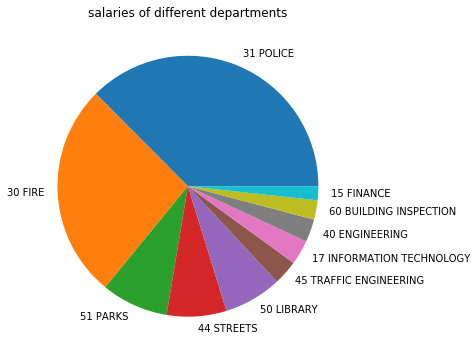

In [10]:
conn = sqlite3.connect('data.db')
L.to_sql("data_table", conn, if_exists="replace", index=False)
df4 = pd.read_sql("select Agency, SUM(year_2015) as year2015, SUM(year_2016) as year2016, SUM(year_2017) as year2017, SUM(year_2018) as year2018, SUM(year_2015) + SUM(year_2016) + SUM(year_2017) + SUM(year_2018) as total from data_table where Character_code = '51 - SALARIES' group by Agency order by total DESC", conn)
df5 = df4.set_index("Agency")
df5["total"].head(10).plot.pie(figsize=(6,6), label="", title = "salaries of different departments")
None

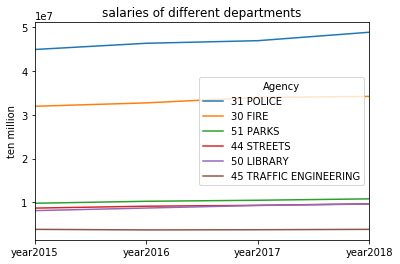

In [11]:
df6 = df4.set_index("Agency")
df6 = df6.drop(columns = ["total"])
df6 = df6.head(6)
df6 = df6.stack()
df6 = df6.unstack(0)
ax = df6.plot.line(title = "salaries of different departments")
ax.set_xticks(range(len(df6.index)))
ax.set_xticklabels(df6.index)
ax.set_ylabel('ten million')

None

In [92]:
df8 = pd.read_sql("select Agency, Organization, SUM(year_2015) as year2015, SUM(year_2016) as year2016, SUM(year_2017) as year2017, SUM(year_2018) as year2018, SUM(year_2015) + SUM(year_2016) + SUM(year_2017) + SUM(year_2018) as total from data_table where Character_code = '51 - SALARIES'  group by Organization order by total DESC", conn)
df8

,Agency,Organization,year2015,year2016,year2017,year2018,total
0,31 POLICE,31100 - POLICE FIELD,2181088.60,40866964.71,41066292.52,42462126.95,1.265765e+08
1,30 FIRE,30110 - FIRE GEN FIELD OP,29572169.84,29567660.72,30765348.88,30926320.27,1.208315e+08
2,50 LIBRARY,50100751 - LIB PUBLIC SERVICE CENTRAL,3097017.40,3411279.96,3732049.52,3942467.49,1.418281e+07
3,31 POLICE,31200 - POLICE SUPPORT,147152.39,4268376.87,4290174.95,4673901.11,1.337961e+07
4,17 INFORMATION TECHNOLOGY,17200 - IT TECHNICAL SERVICES,1849838.92,2014170.44,2115361.80,1998515.89,7.977887e+06
5,51 PARKS,51220 - PARK MTC FORESTRY GENERAL,1844652.55,1728578.18,1770428.62,1955849.03,7.299508e+06
6,17 INFORMATION TECHNOLOGY,17100 - IT APPLICATION DEVELOP SUPPORT,1643580.06,1709348.72,1871524.71,1979598.72,7.204052e+06
7,31 POLICE,31140 - WEST,6294469.79,0.00,0.00,0.00,6.294470e+06
8,44 STREETS,44110 - ST REFUSE COLLECTION,1484312.26,1435719.77,1462242.60,1683059.97,6.065335e+06
9,11 ATTORNEY,11300 - ATTY COUNSEL REPRESENTATION,1340373.04,1428520.26,1489268.63,1538677.45,5.796839e+06


,adopted,projected,executive,requested,actual
Unnamed: 0,,,,,
2012,2812.037,2812.037,2866.704,2798.161,2688.356
2013,3176.262,3139.169,3106.013,2748.740,3009.703
2014,3175.984,3192.298,3159.075,3159.075,3226.293
2015,3311.157,3224.717,3283.950,3175.967,3414.876
2016,3589.531,3469.702,3475.002,3475.002,3382.002
2017,3691.808,3634.399,3726.341,3529.942,3691.551
2018,3783.041,3696.882,3798.041,3755.210,NaN


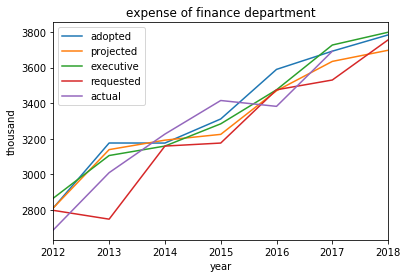

In [166]:
data3 = pd.read_excel('data_finance.xlsx', sheet_name='Sheet3')
df10 = DataFrame(data3)
df10["adopted"] = df10["adopted"] / 1000
df10["projected"] = df10["projected"] / 1000
df10["executive"] = df10["executive"] / 1000
df10["requested"] = df10["requested"] / 1000
df10["actual"] = df10["actual"] / 1000
df10 = df10.set_index('Unnamed: 0')
ax = df10.plot.line(title = "expense of finance department")
ax.set_ylabel('thousand')
ax.set_xlabel("year")
None
ax
df10

,adopted,projected,executive,requested,actual
Unnamed: 0,,,,,
2012,1676.775,1675.345,1709.911,1709.911,1557.141
2013,1951.297,1915.304,1912.985,1612.985,1814.079
2014,1966.407,1977.093,1955.537,1955.537,2025.937
2015,2073.489,2097.909,2058.266,1958.962,2186.033
2016,2276.449,2187.143,2303.483,2234.677,2122.529
2017,2351.670,2265.812,2338.332,2296.089,2304.963
2018,2289.939,2277.780,2289.939,2289.241,NaN


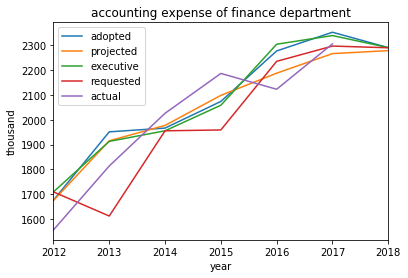

In [152]:
data2 = pd.read_excel('data_finance.xlsx', sheet_name='Sheet2')
df9 = DataFrame(data2)
df9["adopted"] = df9["adopted"] / 1000
df9["projected"] = df9["projected"] / 1000
df9["executive"] = df9["executive"] / 1000
df9["requested"] = df9["requested"] / 1000
df9["actual"] = df9["actual"] / 1000
df9 = df9.set_index('Unnamed: 0')
ax = df9.plot.line(title = "accounting expense of finance department")
ax.set_xlabel("year")
ax.set_ylabel('thousand')
None
ax
df9

In [16]:

# take a dictionary describing current employees,
# randomly take actions for a year, then return
# new list of employees
def simulate_one_year(prior_employees):
    employees = copy.deepcopy(prior_employees)
    
    # simulate promotions
    # TODO: different positions will have different promotion patters
    for employee in employees.values():
        if random.random() < PROMOTION_PROB_PER_EMP:
            employee["salary"] *= PROMOTION_AMOUNT
            
    # simulate retiring
    emp_ids = list(employees.keys())
    for eid in emp_ids:
        if random.random() < RETIRE_PROB_PER_EMP:
            employees.pop(eid)
            
    # simulate hiring
    if random.random() < HIRE_PROB:
        employees[gen_emp_id()] = {"salary": START_SALARY, "position": "engineer"}
        
    return employees

In [28]:
#tabula may be helpful if you can directly read a table from the pdf
import tabula
from tabula import wrapper
wrapper.convert_into("/Users/zhongshilei/Desktop/test3.pdf","output.csv",output_format="csv")

df = wrapper.read_pdf("/Users/zhongshilei/Desktop/test3.pdf", encoding='gbk', pages='all')
print(df)


            Permanent Salaries    $  2 ,501,919  $.1  2 ,524,757  $.2  \
0          Hourly Employee Pay  NaN       5,222  NaN      10,602  NaN   
1                 Overtime Pay  NaN         562  NaN       3,033  NaN   
2              Fringe Benefits  NaN     783,608  NaN     885,318  NaN   
3           Purchased Services  NaN     408,310  NaN     476,953  NaN   
4                     Supplies  NaN      36,994  NaN      44,400  NaN   
5   Inter-Departmental Charges  NaN      11,944  NaN      11,959  NaN   
6    Debt/Other Financing Uses  NaN           0  NaN           0  NaN   
7               Capital Assets  NaN           0  NaN           0  NaN   
8           Total Expenditures    $  3 ,748,559    $  3 ,957,022    $   
9        Inter-Agency Billings  NaN     738,856  NaN     781,038  NaN   
10                  Net Budget    $  3 ,009,703    $  3 ,175,984    $   

    2 ,513,489  $.3  2 ,501,154  $.4  2 ,566,716  $.5  2 ,607,116  
0        8,358  NaN      13,086  NaN      13,086  NaN  

In [112]:
#pdfminer can display the content of the pdf, but it's hard to read data from that

from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams
from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfdevice import PDFDevice

from urllib.request import urlopen

#fp = urlopen("https://www.cityofmadison.com/finance/documents/2015OpBud/Adopted/034-oper33.pdf")
fp = open("test1.pdf", 'rb')

#Create an interpreter associated with the document
parser = PDFParser(fp)

#PDF document object
doc = PDFDocument()

#Connect interpreter and document objects
parser.set_document(doc)
doc.set_parser(parser)

#Initialize the document(without password)
doc.initialize("")

#Create a PDF Explorer
resource = PDFResourceManager()

#Parameter analyzer
laparam = LAParams()

#Create an aggregator
device = PDFPageAggregator(resource, laparams=laparam)

#Create a PDF page interpreter
interpreter = PDFPageInterpreter(resource, device)

#Use the document object to get the collection of pages
for page in doc.get_pages():
    
    #Read using page interpreter
    interpreter.process_page(page)

    #Use an aggregator to get content
    layout = device.get_result()

    for out in layout:
    
        if hasattr(out, "get_text"):
            
            print(out.get_text())

Agency Number:
Budget Function:

33
General Government

Finance

The mission of
the City Finance Department is to enhance the financial health of
the City and provide
stewardship of City resources through financial information, advice and support to the public, employees, City
agencies and policymakers.

Major Service

Accounting
Budget and Audit
Risk Management
Administrative Support

    Agency Total

2011
Actual

$       
1,705,624
719,698
47,600
464,474
$       
2,937,396

2012
Adopted

$       
1,676,775
651,808
38,417
445,037
$       
2,812,037

2012
Projected

$       
1,675,345
651,808
38,597
446,287
$       
2,812,037

2013
Request

$       
1,612,985
730,217
15,425
390,113
$       
2,748,740

2013
Executive

$       
1,912,985
730,217
15,425
447,386
$       
3,106,013

2013
Adopted

$       
1,951,297
746,126
21,119
457,720
$       
3,176,262

Adopted Budget Highlights

The Budget includes:

1. Deleting one vacant position of Account Clerk 2 in the Ambulance Accounting sectio

4
Finance
Agency Number:
33Budget Function:
General Government
201320142014201520152015Major Service
Actual
Adopted
Projected
Request
Executive
Adopted
Accounting
1,814,079
$       1,966,407
$       1,977,093
$       1,958,962
$       2,058,266
$       2,073,489
$      
 Budget and Audit
709,638
          
 751,236
          
 758,003
          
 756,115
          
 760,300
          
 766,169
          
 Risk Management
31,622
            
 (1,515)
             
 (1,864)
             
 (5,967)
             
 (4,281)
             
 (1,983)
             
 Administrative Support
454,364
          
 459,856
          
 459,066
          
 466,857
          
 469,665
          
 473,482
          
     Agency Total
3,009,703
$       3,175,984
$       3,192,298
$       3,175,967
$       3,283,950
$       3,311,157
$       Adopted Budget Highlights
The
 mission
 of the
 City
 Finance
 Department
 is to enhance
 the
 financial
 health
 of the
 City
 and
 provide
 stewardship
 of City
 resourc

,2013_actual,2014_adopted,2014_projected,2015_request,2015_executive,2015_adopted
accounting,18140.79,19664.07,19770.93,19589.62,20582.66,20734.89
budget and audit,7096.38,7512.36,7580.03,7561.15,7603.00,7661.69
risk management,316.22,-15.15,-18.64,-59.67,-42.81,-19.83
administrative support,4543.64,4598.56,4590.66,4668.57,4696.65,4734.82
total,30097.03,31759.84,31922.98,31759.67,32839.50,33111.57


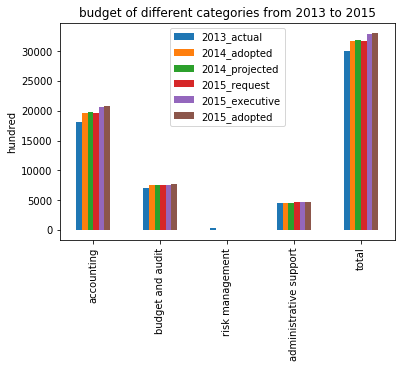

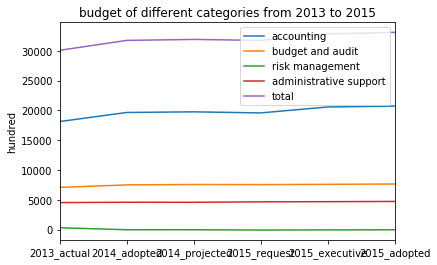

In [162]:
#PyPDF is useful for reading data from the pdf

# importing required modules 
import PyPDF2 
  
# creating a pdf file object 
pdfFileObj = open('test3.pdf', 'rb') 
  
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
  
# printing number of pages in pdf file 
print(pdfReader.numPages) 
  
# creating a page object 
pageObj = pdfReader.getPage(0) 
  
# extracting text from page 
str = ''
str = pageObj.extractText()
print(str)
str = str.replace("$", "")
str = str.replace(",", "").strip()
str = str.replace(")", "")
L = str.split("\n")
L.remove(' (ERP')
L1 = []
for letter in L:
    if letter.startswith(" ("):
        L1.append(0 - int(letter.replace(" (","")))

    if letter.strip().isdigit():
        L1.append(int(letter.strip()))

d = dict()
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []
l6 = []
for i in range(len(L1)):
    if i % 6 == 0:
        l1.append(L1[i])
    if i % 6 == 1:
        l2.append(L1[i])
    if i % 6 == 2:
        l3.append(L1[i])
    if i % 6 == 3:
        l4.append(L1[i])
    if i % 6 == 4:
        l5.append(L1[i])
    if i % 6 == 5:
        l6.append(L1[i])
        
d["2013_actual"] = l1
d["2014_adopted"] = l2
d["2014_projected"] = l3
d["2015_request"] = l4
d["2015_executive"] = l5
d["2015_adopted"] = l6

df10 = DataFrame(d, index = ["accounting", "budget and audit", "risk management", "administrative support", "total"])


# closing the pdf file object 
pdfFileObj.close()

df10["2013_actual"] = df10["2013_actual"] / 100
df10["2014_adopted"] = df10["2014_adopted"] / 100
df10["2014_projected"] = df10["2014_projected"] / 100
df10["2015_request"] = df10["2015_request"] / 100
df10["2015_executive"] = df10["2015_executive"] / 100
df10["2015_adopted"] = df10["2015_adopted"] / 100

df11 = df10.stack()
df11 = df11.unstack(0)

ax1 = df10.plot.bar(title = "budget of different categories from 2013 to 2015")
ax1.set_ylabel('hundred')


ax = df11.plot.line(title = "budget of different categories from 2013 to 2015")
ax.set_xticks(range(len(df11.index)))
ax.set_xticklabels(df11.index)
ax.set_ylabel('hundred')

print(L)
df10

4
                 accounting  budget and audit  risk management  \
actual_year1        1705624            719698            47600   
adopted_year2       1676775            651808            38417   
projected_year2     1675345            651808            38597   
requested_year3     1612985            730217            15425   
executive_year3     1912985            730217            15425   
adopted_year3       1951297            746126            21119   

                 administrative support    total  
actual_year1                     464474  2937396  
adopted_year2                    445037  2812037  
projected_year2                  446287  2812037  
requested_year3                  390113  2748740  
executive_year3                  447386  3106013  
adopted_year3                    457720  3176262  
4
                 accounting  budget and audit  risk management  \
actual_year1        1557141            674269            49053   
adopted_year2       1951297            74612

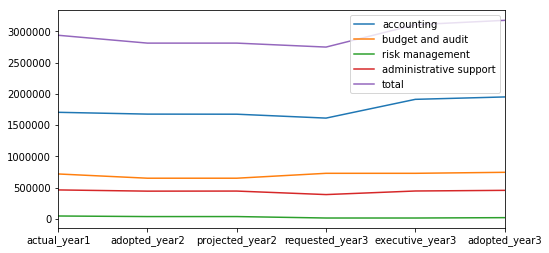

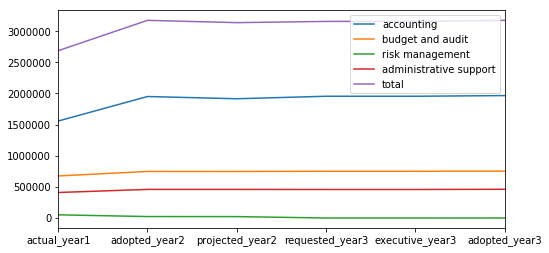

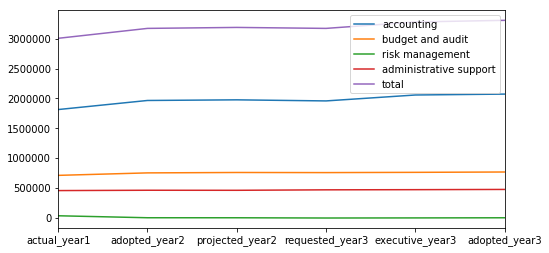

In [81]:
test = ["test1.pdf","test2.pdf","test3.pdf"]
# creating a pdf file object 
for t in test:
    pdfFileObj = open(t, 'rb') 

    # creating a pdf reader object 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

    # printing number of pages in pdf file 
    print(pdfReader.numPages) 

    # creating a page object 
    pageObj = pdfReader.getPage(0) 

    # extracting text from page 
    str = ''
    str = pageObj.extractText()
    str = str.replace("$", "")
    str = str.replace(",", "").strip()
    str = str.replace(")", "")
    L3 = str.split("\n")

    if " (ERP" in L3:
        L3.remove(' (ERP')
    L4 = []
    L5 = []
    for letter in L3:
        if letter.startswith(" ("):
            L4.append(0 - int(letter.replace(" (","")))

        if letter.strip().isdigit():
            L4.append(int(letter.strip()))
    d = dict()
    l = ["actual_year1","adopted_year2","projected_year2","requested_year3","executive_year3","adopted_year3"]
    l0 = ["accounting","budget and audit","risk management","administrative support","total"]
    
    l1 = []
    l2 = []
    l3 = []
    l4 = []
    l5 = []
    l6 = []
    for i in range(len(L4)):
        if i % 6 == 0:
            l1.append(L4[i])
        if i % 6 == 1:
            l2.append(L4[i])
        if i % 6 == 2:
            l3.append(L4[i])
        if i % 6 == 3:
            l4.append(L4[i])
        if i % 6 == 4:
            l5.append(L4[i])
        if i % 6 == 5:
            l6.append(L4[i])
    df0 = pd.DataFrame([l1,l2,l3,l4,l5,l6], index = l, columns=l0)
    print(df0)
    df0.plot.line(figsize=(8,4))

,total
year,
2015,3447.36220
2016,3413.36074
2017,3754.65667
2018,3610.89069


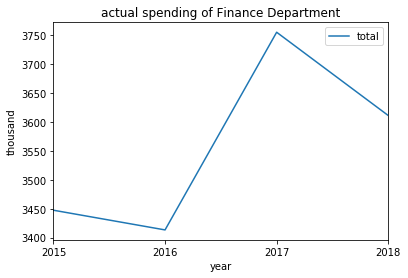

In [87]:
dic = {}
total = []
total.append( L1["year_2015"].sum()/1000)
total.append( L1["year_2016"].sum()/1000)
total.append( L1["year_2017"].sum()/1000)
total.append( L1["year_2018"].sum()/1000)
dic["year"] = ["2015", "2016", "2017", "2018"]
dic["total"] = total

df11 = pd.DataFrame(dic)
df11 = df11.set_index("year")

ax = df11.plot.line(title = "actual spending of Finance Department")
ax.set_xticks(range(len(df11.index)))
ax.set_xticklabels(df11.index)
ax.set_ylabel('thousand')
None
df11

,adopted,projected,executive,requested,actual,error,error_executive,error_adopted,error_projected,error_requested
Unnamed: 0,,,,,,,,,,
2012,2812.037,2812.037,2866.704,2798.161,2688.356,6.634092,6.634092,4.600618,4.600618,4.084466
2013,3176.262,3139.169,3106.013,2748.740,3009.703,3.199984,3.199984,5.534068,4.301620,8.670723
2014,3175.984,3192.298,3159.075,3159.075,3226.293,2.083444,2.083444,1.559344,1.053686,2.083444
2015,3311.157,3224.717,3283.950,3175.967,3414.876,3.833990,3.833990,3.037270,5.568548,6.996125
2016,3589.531,3469.702,3475.002,3475.002,3382.002,2.749851,2.749851,6.136277,2.593139,2.749851
2017,3691.808,3634.399,3726.341,3529.942,3691.551,0.942422,0.942422,0.006962,1.548184,4.377808
2018,3783.041,3696.882,3798.041,3755.210,NaN,NaN,NaN,NaN,NaN,NaN


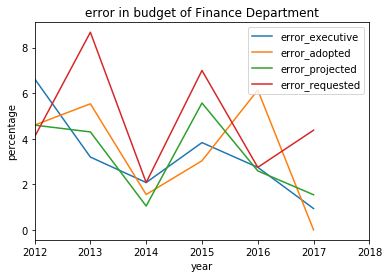

In [181]:
df10["error_executive"] = abs((df10["actual"]-df10["executive"])/df10["actual"])*100
df10["error_adopted"] = abs((df10["actual"]-df10["adopted"])/df10["actual"])*100
df10["error_projected"] = abs((df10["actual"]-df10["projected"])/df10["actual"])*100
df10["error_requested"] = abs((df10["actual"]-df10["requested"])/df10["actual"])*100
df11 = df10[["error_executive","error_adopted","error_projected","error_requested"]]

ax = df11.plot.line(title = "error in budget of Finance Department")
ax.set_ylabel('percentage')
ax.set_xlabel('year')
df10

In [192]:
df12 = df10[["adopted","projected","executive","requested","actual"]]
df13 = df12.corr()
print(df13)
df12["predicted_actual"] = (df12["adopted"]*(df13.loc["adopted","actual"])+df12["projected"]*(df13.loc["projected","actual"])+df12["requested"]*(df13.loc["requested","actual"]))/(df13.loc["adopted","actual"]+df13.loc["projected","actual"]+df13.loc["requested","actual"])
df12["old error"]=abs((df12["actual"]-df12["executive"])/df10["actual"])*100
df12["new error"]=abs((df12["actual"]-df12["predicted_actual"])/df10["actual"])*100
df12

            adopted  projected  executive  requested    actual
adopted    1.000000   0.994024   0.984955   0.922801  0.932947
projected  0.994024   1.000000   0.989146   0.925608  0.941473
executive  0.984955   0.989146   1.000000   0.940901  0.949074
requested  0.922801   0.925608   0.940901   1.000000  0.888323
actual     0.932947   0.941473   0.949074   0.888323  1.000000


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [ipykernel_launcher.py:4]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [ipykernel_launcher.py:5]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [ipykernel_launcher.py:6]


,adopted,projected,executive,requested,actual,predicted_actual,old error,new error
Unnamed: 0,,,,,,,,
2012,2812.037,2812.037,2866.704,2798.161,2688.356,2807.575358,6.634092,4.434657
2013,3176.262,3139.169,3106.013,2748.740,3009.703,3026.157680,3.199984,0.546721
2014,3175.984,3192.298,3159.075,3159.075,3226.293,3176.106537,2.083444,1.555546
2015,3311.157,3224.717,3283.950,3175.967,3414.876,3238.231900,3.833990,5.172782
2016,3589.531,3469.702,3475.002,3475.002,3382.002,3511.871039,2.749851,3.840005
2017,3691.808,3634.399,3726.341,3529.942,3691.551,3620.198622,0.942422,1.932856
2018,3783.041,3696.882,3798.041,3755.210,NaN,3744.731504,NaN,NaN


180.6130000000072 -360609.42500001454


,actual,year,1,regression,coefficient,old error,error_regression,error_coefficient
Unnamed: 0,,,,,,,,
2012,2688.356,2012,1.0,2783.931,2807.575358,6.634092,3.555147,4.434657
2013,3009.703,2013,1.0,2964.544,3026.157680,3.199984,1.500447,0.546721
2014,3226.293,2014,1.0,3145.157,3176.106537,2.083444,2.514837,1.555546
2015,3414.876,2015,1.0,3325.770,3238.231900,3.833990,2.609348,5.172782
2016,3382.002,2016,1.0,3506.383,3511.871039,2.749851,3.677733,3.840005
2017,3691.551,2017,1.0,3686.996,3620.198622,0.942422,0.123390,1.932856


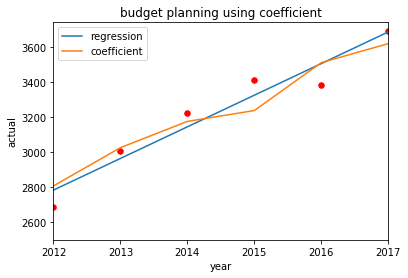

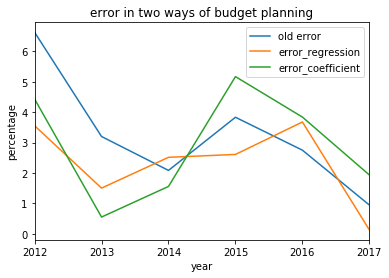

In [232]:
df14 = DataFrame(df12["actual"])
df14 = df14.drop([2018])
df14["year"]=[2012,2013,2014,2015,2016,2017]
df14["1"]=np.ones(6)
res = np.linalg.lstsq(df14[["year", "1"]], df14["actual"], rcond=None)
coefficients = res[0]
m = coefficients[0]
n = coefficients[1]
ax = df14.plot.scatter(x='year', y='actual', c='red', s=30, xlim=0, ylim=2500)
df14["regression"] = df14["year"] * m + n
df14["coefficient"] = df12["predicted_actual"].drop([2018])
df14.plot.line(x='year', y='regression', ax=ax,title = "budget planning using linear regression")
df14.plot.line(x='year', y='coefficient', ax=ax,title = "budget planning using coefficient")
print(m,n)

df14["old error"] = df12["old error"].drop([2018])
df14["error_regression"] = abs((df14["actual"]-df14["regression"])/df10["actual"])*100
df14["error_coefficient"] = df12["new error"].drop([2018])

ax = df14[["old error","error_regression","error_coefficient"]].plot.line(title = "error in two ways of budget planning")
ax.set_ylabel('percentage')
ax.set_xlabel('year')
df14

In [150]:
test = ["traffic1.pdf","traffic2.pdf","traffic3.pdf","traffic4.pdf","traffic5.pdf",
        "traffic6.pdf","traffic7.pdf"]
# creating a pdf file object 
for t in test:
    pdfFileObj = open(t, 'rb') 

    # creating a pdf reader object 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

    # printing number of pages in pdf file 
    #print(pdfReader.numPages) 

    # creating a page object 
    pageObj = pdfReader.getPage(0) 

    # extracting text from page 
    str = ''
    str = pageObj.extractText()
    str = str.replace("$", "")
    str = str.replace(",", "").strip()
    str = str.replace(")", "")
    L5 = str.split("\n")
    L6 = []
    for letter in L5[:-5]:
        if letter.strip().isdigit():
            L6.append(int(letter.strip()))
    d = dict()
    l = ["actual_year1","adopted_year2","projected_year2","requested_year3","executive_year3","adopted_year3"]
    l0 = ["signs","street lighting","pavement markings","communications","traffic signals",
          "special services","total"]
    
    l1 = []
    l2 = []
    l3 = []
    l4 = []
    l5 = []
    l6 = []
    l7 = []
    for i in range(len(L6)):
        if i % 7 == 0:
            l1.append(L6[i])
        if i % 7 == 1:
            l2.append(L6[i])
        if i % 7 == 2:
            l3.append(L6[i])
        if i % 7 == 3:
            l4.append(L6[i])
        if i % 7 == 4:
            l5.append(L6[i])
        if i % 7 == 5:
            l6.append(L6[i])
        if i % 7 == 6:
            l7.append(L6[i])
    df15 = pd.DataFrame([l1,l2,l3,l4,l5,l6,l7],index = l0)

    print(df15)
    



                         0        1        2        3          4
signs              1026221  1539709   850709  1229952   698725.0
street lighting    1026221  1539709   204184   794041   735972.0
pavement markings   975125  1569043   204184   794041  5149669.0
communications      975125   875630   185104   830515  4995178.0
traffic signals    1017151   875630   185104   616701  4995178.0
special services   1196980   802473   226676   616701  5230067.0
total              1196980   802473  1229952   698725        NaN
                         0        1       2       3          4
signs              1017151  1660758  818786  830515   668898.0
street lighting    1017151  1603950  226676  815338   686250.0
pavement markings   902432  1615459  226676  784542  5230067.0
communications      876854   850709  450236  800633  5271274.0
traffic signals     903963   850709  440979  735972  5162550.0
special services   1569043   809995  460689  735972  5285781.0
total              1569043   787326  83